In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Leemos el dataset y definimos variable

In [36]:
thegrefG= pd.read_csv("Downloads/lewi-1 (5).csv")
thegrefG

,Temporada,PJT,Goles
0,14/15,49,25
1,15/16,49,67
2,16/17,147,110
3,17/18,195,151
4,18/19,242,191
5,19/20,289,246
6,20/21,329,296
7,21/22,375,346


# Se me cambia un valor al cambiar de excel a csv asi q queda mas on menos lineal por si se preguntaba.

In [37]:
thegrefG.head()


,Temporada,PJT,Goles
0,14/15,49,25
1,15/16,49,67
2,16/17,147,110
3,17/18,195,151
4,18/19,242,191


# Rsquared y demas

In [38]:
import statsmodels.formula.api as smf

In [39]:
lm=smf.ols(formula="PJT~Goles", data=thegrefG).fit()
lm

In [40]:
lm.params 

Intercept    16.683989
Goles         1.076486
dtype: float64

In [41]:
lm.pvalues

Intercept    0.302799
Goles        0.000005
dtype: float64

In [42]:
lm.rsquared

0.9743134210595628

In [43]:
lm.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000226F097A160>>

In [44]:
thegrefG.shape

(8, 3)

# Definimos regresión lineal

In [45]:
reg = LinearRegression()
reg.fit(thegrefG[["PJT"]], thegrefG["Goles"])

LinearRegression()

# Predecimos distintos valores

In [46]:
reg.predict([[25],[50]])

D:\progaramcioin\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.12460969, 34.75178126])

In [47]:
print(f"la línea intersecta en : {reg.intercept_} y tiene una pendiente de {reg.coef_}")

la línea intersecta en : -10.502561879754609 y tiene una pendiente de [0.90508686]


In [48]:
 reg.coef_ * thegrefG["Goles"] + reg.intercept_

0     12.124610
1     50.138258
2     89.056993
3    126.165554
4    162.369029
5    212.148806
6    257.403149
7    302.657493
Name: Goles, dtype: float64

# Creamos la variable predicción

In [49]:
pred = pd.Series(reg.predict(thegrefG[["Goles"]]))
pred

D:\progaramcioin\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Goles
Feature names seen at fit time, yet now missing:
- PJT

  warnings.warn(message, FutureWarning)


0     12.124610
1     50.138258
2     89.056993
3    126.165554
4    162.369029
5    212.148806
6    257.403149
7    302.657493
dtype: float64

# Mostramos la predcción en el DF

In [50]:
thegrefG["Pred. Goles"] = pred
thegrefG

,Temporada,PJT,Goles,Pred. Goles
0,14/15,49,25,12.124610
1,15/16,49,67,50.138258
2,16/17,147,110,89.056993
3,17/18,195,151,126.165554
4,18/19,242,191,162.369029
5,19/20,289,246,212.148806
6,20/21,329,296,257.403149
7,21/22,375,346,302.657493


# Graficamos predicción

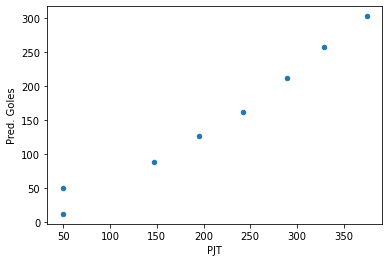

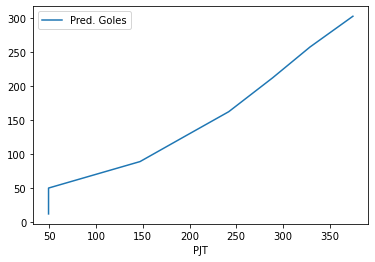

In [34]:
thegrefG.plot.scatter(x="PJT", y="Pred. Goles")
ax = thegrefG.plot.line(x="PJT", y="Pred. Goles")